<a href="https://colab.research.google.com/github/dev-researcher/automatas/blob/main/Exam1automatas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Entendiendo el contenido del capítulo 4: Application I: Pattern Matching

### Resumen del contenido: Como un primer ejemplo de una aplicación práctica de los autómatas, consideramos el problema de emparejamiento de patrones.
- *Descripción del problema*:
  - Se requiere diseñar un algoritmo que identifique un factor \([i,j]\) del texto que coincida con un patrón, de tal manera que la posición \(j\) sea mínima y la posición \(i\) esté lo más cerca posible de \(j\), es decir, que sea máximo respecto a \(j\).
  - Se pide ejecutar el algoritmo en un texto específico y con un patrón dado, y analizar la complejidad del algoritmo.


- *Algoritmo 19*:
  Estimemos la complejidad de PatternMatchingNFA para un texto de longitud n sobre un alfabeto Σ de k letras, donde k ≤ n, y un patrón de longitud m. RegtoNFA es la concatenación de RegtoNFAε y NFAεtoNFA. Dado que Σ∗p tiene un tamaño de O(k + m), RegtoNFAε toma un tiempo de O(k + m) y produce un NFA-ε con O(k + m) estados y O(k + m) transiciones.

In [8]:
# Simulación de un NFA para Pattern Matching

class NFA:
    def __init__(self, pattern, alphabet):
        self.pattern = pattern
        self.alphabet = alphabet
        self.states = []
        self.transitions = {}
        self.final_states = set()

    # Función para agregar transiciones entre los estados del NFA
    def add_transition(self, state, symbol, next_state):
        if (state, symbol) not in self.transitions:
            self.transitions[(state, symbol)] = set()
        self.transitions[(state, symbol)].add(next_state)

    # Construir un NFA básico para el patrón Σ∗p
    def build_nfa(self):
        for i in range(len(self.pattern) + 1):
            self.states.append(i)
            if i == len(self.pattern):
                self.final_states.add(i)

        for i, char in enumerate(self.pattern):
            self.add_transition(i, char, i + 1)

    # Simulación del NFA en un texto dado
    def simulate(self, text):
        current_states = {0}  # Empezar desde el estado inicial (q0)

        for i, char in enumerate(text):
            next_states = set()

            for state in current_states:
                if (state, char) in self.transitions:
                    next_states.update(self.transitions[(state, char)])

            current_states = next_states

            if current_states & self.final_states:  # Verificar si algún estado final es alcanzado
                return i - len(self.pattern) + 1

        return -1  # Si no se encuentra coincidencia


# Función principal que usa el NFA para la coincidencia de patrones
def PatternMatchingNFA(text, pattern):
    alphabet = set(text)
    nfa = NFA(pattern, alphabet)
    nfa.build_nfa()

    result = nfa.simulate(text)

    if result != -1:
        print(f"Pattern '{pattern}' found at index {result}")
    else:
        print(f"Pattern '{pattern}' not found in the text")


# Probar el algoritmo en Google Colab
text = "ababcabcabababcd"
pattern = "cabca"

PatternMatchingNFA(text, pattern)


Pattern 'cabca' not found in the text



- *Algoritmo 20*:
  Procedemos como en el caso anterior, pero construyendo un DFA para Σ∗p en lugar de un NFA, como se describe en el algoritmo 20.

In [6]:
class DFA:
    def __init__(self, pattern, alphabet):
        self.pattern = pattern
        self.alphabet = alphabet
        self.states = []
        self.transitions = {}
        self.final_states = set()

    # Construir un DFA para el patrón Σ∗p
    def build_dfa(self):
        for i in range(len(self.pattern) + 1):
            self.states.append(i)
            if i == len(self.pattern):
                self.final_states.add(i)

        for i, char in enumerate(self.pattern):
            self.transitions[(i, char)] = i + 1

    # Simulación del DFA en un texto dado
    def simulate(self, text):
        current_state = 0  # Empezar desde el estado inicial (q0)

        for i, char in enumerate(text):
            if (current_state, char) in self.transitions:
                current_state = self.transitions[(current_state, char)]
            else:
                current_state = 0  # Reiniciar si no hay transición válida

            if current_state in self.final_states:  # Verificar si se alcanza el estado final
                return i - len(self.pattern) + 1

        return -1  # Si no se encuentra coincidencia

# Función principal que usa el DFA para la coincidencia de patrones
def PatternMatchingDFA(text, pattern):
    alphabet = set(text)
    dfa = DFA(pattern, alphabet)
    dfa.build_dfa()

    result = dfa.simulate(text)

    if result != -1:
        print(f"Pattern '{pattern}' found at index {result}")
    else:
        print(f"Pattern '{pattern}' not found in the text")

# Probar el algoritmo en Google Colab
text = "ababcabcabababcd"
pattern = "abcd"

PatternMatchingDFA(text, pattern)

Pattern 'abcd' not found in the text


- *Algoritmo 21*:

- *Entrada del NFA:* El NFA es representado como una tupla (Q, Sigma, delta, q0, F) donde:
  - Q: conjunto de estados.
  - Sigma: alfabeto.
  - delta: función de transición.
  - q0: estado inicial.
  - F: conjunto de estados de aceptación.

- *Proceso:* El algoritmo sigue el procedimiento mencionado en la traducción, utilizando un conjunto de trabajo (W) y asegurándose de que cada conjunto de estados se considere y procese solo una vez.

- *Salida del DFA:* El DFA se devuelve como una tupla (Q_dfa, Sigma, Delta_dfa, q0_dfa, F_dfa) donde:
  - Q_dfa: conjunto de estados del DFA.
  - Sigma: alfabeto del DFA (mismo que el del NFA).
  - Delta_dfa: función de transición del DFA.
  - q0_dfa: estado inicial del DFA.
  - F_dfa: conjunto de estados de aceptación del DFA.

In [5]:
def nfa_to_dfa(nfa):
    # Desempaquetar el NFA
    Q, Sigma, delta, q0, F = nfa

    # Inicializar el DFA
    Q_dfa = set()  # Estados del DFA
    Delta_dfa = {}  # Función de transición del DFA
    F_dfa = set()  # Estados de aceptación del DFA

    # Inicializar el workset con el estado inicial del NFA
    W = [frozenset([q0])]  # Usamos frozenset para que sea hashable y se pueda usar en sets
    Q_dfa.add(frozenset([q0]))

    while W:
        S = W.pop()
        Q_dfa.add(S)

        if S.intersection(F):  # Si hay intersección, es un estado de aceptación
            F_dfa.add(S)

        for a in Sigma:
            # Calcular la transición para el conjunto de estados S
            S_prime = frozenset({q_prime for q in S for q_prime in delta.get((q, a), [])})

            if S_prime and S_prime not in Q_dfa:
                W.append(S_prime)

            Delta_dfa[(S, a)] = S_prime

    return Q_dfa, Sigma, Delta_dfa, frozenset([q0]), F_dfa

# Ejemplo de uso
nfa = (
    {'q0', 'q1', 'q2'},  # Conjunto de estados
    {'a', 'b'},  # Alfabeto
    {('q0', 'a'): {'q1'}, ('q1', 'b'): {'q2'}, ('q2', 'a'): {'q1'}},  # Función de transición
    'q0',  # Estado inicial
    {'q2'}  # Estados de aceptación
)

dfa = nfa_to_dfa(nfa)

# Imprimir los componentes del DFA resultante
Q_dfa, Sigma_dfa, Delta_dfa, q0_dfa, F_dfa = dfa
print("Estados del DFA:", Q_dfa)
print("Estado inicial del DFA:", q0_dfa)
print("Estados de aceptación del DFA:", F_dfa)
print("Transiciones del DFA:")
for key, value in Delta_dfa.items():
    print(f"  δ({key[0]}, '{key[1]}') -> {value}")

Estados del DFA: {frozenset({'q0'}), frozenset({'q1'}), frozenset({'q2'})}
Estado inicial del DFA: frozenset({'q0'})
Estados de aceptación del DFA: {frozenset({'q2'})}
Transiciones del DFA:
  δ(frozenset({'q0'}), 'b') -> frozenset()
  δ(frozenset({'q0'}), 'a') -> frozenset({'q1'})
  δ(frozenset({'q1'}), 'b') -> frozenset({'q2'})
  δ(frozenset({'q1'}), 'a') -> frozenset()
  δ(frozenset({'q2'}), 'b') -> frozenset()
  δ(frozenset({'q2'}), 'a') -> frozenset({'q1'})


Lazy DFAs
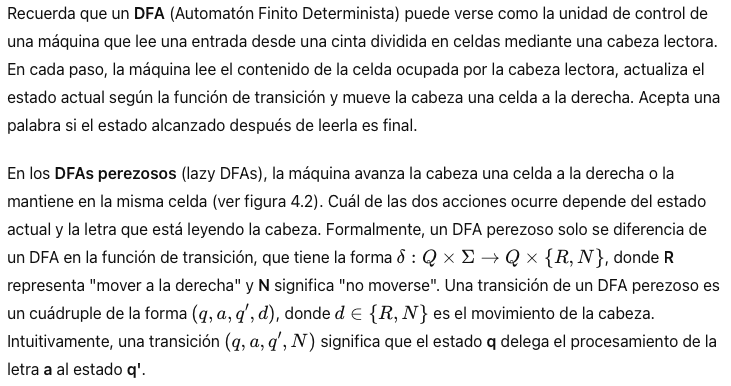


- *Algoritmo 22*:

  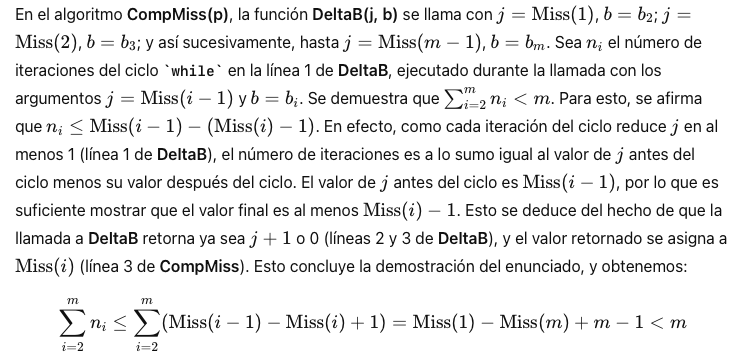

In [4]:
# Función DeltaB como se describe en el algoritmo
def DeltaB(miss, j, b, pattern):
    while b != pattern[j] and j != 0:
        j = miss[j]
    if b == pattern[j]:
        return j + 1
    else:
        return 0

# Algoritmo CompMiss
def CompMiss(pattern):
    m = len(pattern)
    miss = [0] * (m + 1)
    miss[0] = 0
    miss[1] = 0

    for i in range(2, m + 1):
        miss[i] = DeltaB(miss, miss[i - 1], pattern[i - 1], pattern)

    return miss

# Ejemplo para probar el algoritmo
pattern = "ababc"
miss_table = CompMiss(pattern)
print("Tabla Miss para el patrón:", miss_table)


Tabla Miss para el patrón: [0, 0, 0, 1, 2, 0]
